# **Import das bibliotecas utilizadas**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression
from pylab import plot, show, legend, title, xlabel, ylabel, axis
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
sns.set()
plt.style.use('seaborn-whitegrid')

data = pd.read_csv("/content/usd_coin.csv")
print(data.head())

   Ultimo  Abertura  Maxima  Minima  Ultimo_2  Abertura_2  Maxima_2  Minima_2  \
0  1.0127    0.9848  1.0165  0.9829    1.0013      1.0127    1.0317    0.9939   
1  1.0013    1.0127  1.0317  0.9939    1.0022      1.0013    1.0150    0.9913   
2  1.0022    1.0013  1.0150  0.9913    0.9913      1.0022    1.0099    0.9906   
3  0.9913    1.0022  1.0099  0.9906    0.9950      0.9913    1.0001    0.9895   
4  0.9950    0.9913  1.0001  0.9895    0.9926      0.9950    0.9986    0.9864   

   Ultimo_3  Abertura_3  Maxima_3  Minima_3  Dia_seguinte  
0    1.0022      1.0013    1.0150    0.9913        0.9913  
1    0.9913      1.0013    1.0099    0.9906        0.9950  
2    0.9950      0.9913    1.0001    0.9895        0.9926  
3    0.9926      0.9950    0.9986    0.9864        0.9952  
4    0.9952      0.9926    1.0000    0.9867        1.0006  


# **Análise dos dados**

In [ ]:
plt.figure(figsize=(10, 4))
plt.title("USD - Variação da taxa de câmbio")
plt.ylabel("Fechamento")
plt.xlabel("Tempo")
plt.plot(data["Ultimo"])
plt.show()

In [ ]:
print(data.corr())
sns.heatmap(data.corr())
plt.show()

# **Definindo varáveis para o cálculo**

## Base aleatória

In [28]:
x_a = data[["Abertura_2","Ultimo_2","Ultimo_3","Minima_2","Abertura","Abertura_3","Ultimo","Minima_3","Minima","Maxima_2"]]
y_a = data["Dia_seguinte"]
x_a = x_a.to_numpy()
y_a = y_a.to_numpy()
y_a = y_a.reshape(-1, 1)

## Base ordenada

In [29]:
x_o = data[["Ultimo_3", "Ultimo_2","Abertura_3"]]
y_o = data["Dia_seguinte"]
x_o = x_o.to_numpy()
y_o = y_o.to_numpy()
y_o = y_o.reshape(-1, 1)

# **Aplicando árvores de decisões às bases ordenadas e aleatórias**

In [30]:
test_number = 0.2
x_a_train, x_a_test, y_a_train, y_a_test = train_test_split(x_a, y_a, test_size=test_number, random_state=42)
x_o_train, x_o_test, y_o_train, y_o_test = train_test_split(x_o, y_o, test_size=test_number, random_state=42)


model_a = DecisionTreeRegressor()
model_a.fit(x_a_train, y_a_train)
ypred_a = model_a.predict(x_a_test)

model_o = DecisionTreeRegressor()
model_o.fit(x_o_train, y_o_train)
ypred_o = model_o.predict(x_o_test)

## Exibição dos resultados obtidos

In [31]:
data_a = pd.DataFrame(data={"Resultados obtidos base aleatória": ypred_a.flatten()})
data_o = pd.DataFrame(data={"Resultados obtidos base ordenada": ypred_o.flatten()})
print(data_a)
print(data_o)

     Resultados obtidos base aleatória
0                               0.9993
1                               1.0007
2                               0.9970
3                               0.9999
4                               1.0003
..                                 ...
214                             0.9999
215                             0.9991
216                             1.0014
217                             1.0000
218                             0.9964

[219 rows x 1 columns]
     Resultados obtidos base ordenada
0                            1.000900
1                            0.998900
2                            0.999000
3                            1.000000
4                            0.999800
..                                ...
214                          0.999540
215                          0.999891
216                          0.999900
217                          0.999517
218                          1.000600

[219 rows x 1 columns]


# **Calclulando o erro com base no resultado obtido e no resultado esperado**

In [32]:
error_a = y_a - ypred_a
error_o = y_o - ypred_o

average_a = sum(error_a[0])/len(error_a[0]) # Média
average_o = sum(error_o[0])/len(error_o[0]) # Média

error_a = pd.DataFrame(data={"Erro aleatório": error_a.flatten()})
error_o = pd.DataFrame(data={"Erro ordenado": error_o.flatten()})


print(error_a.head())
print(error_o.head())

print("\n\nMédia dos erros aleatórios: ", average_a)
print("Média dos erros ordenados: ", average_o)
print("Diferença: ", average_a - average_o)



   Erro aleatório
0         -0.0080
1         -0.0094
2         -0.0057
3         -0.0086
4         -0.0090
   Erro ordenado
0        -0.0096
1        -0.0076
2        -0.0077
3        -0.0087
4        -0.0085


Média dos erros aleatórios:  -0.008437899543379037
Média dos erros ordenados:  -0.008379829986097152
Diferença:  -5.8069557281884704e-05


In [ ]:
Target = y_a[0:219]
Predicted = ypred_a
plt.plot(Target, label= "Objetivo")
plt.plot(Predicted, label= "Previsto")
plt.legend()
plt.show()

Target = y_o[0:219]
Predicted = ypred_o
plt.plot(Target, label= "Objetivo")
plt.plot(Predicted, label= "Previsto")
plt.legend()
plt.show()

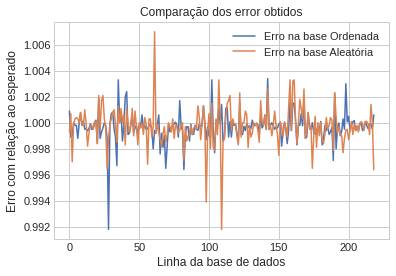

In [38]:
plt.plot(ypred_o, label= "Erro na base Ordenada")
plt.plot(ypred_a, label= "Erro na base Aleatória")
plt.title("Comparação dos error obtidos")
plt.ylabel("Erro com relação ao esperado")
plt.xlabel("Linha da base de dados")
plt.legend()
plt.show()